In [106]:
# define a pytensor Op for our likelihood function
from pl_temp_fit import Exp_data_utils, fit_EL_exp_EMCEE

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


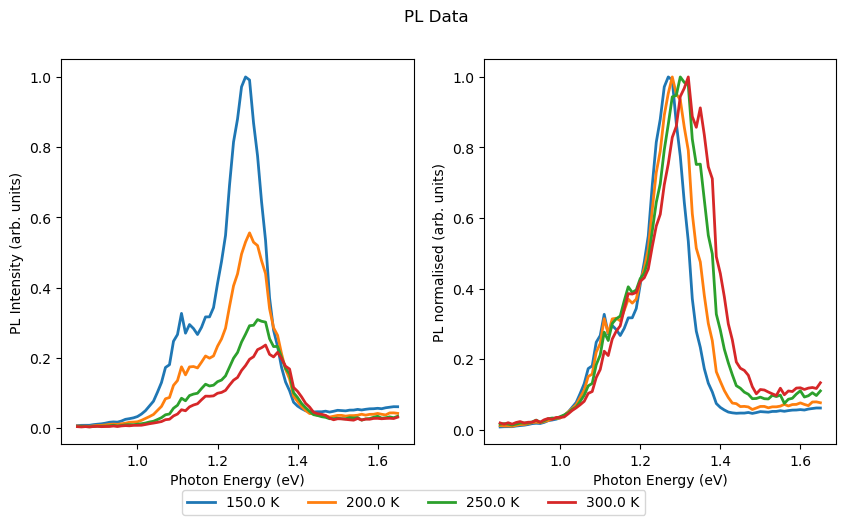

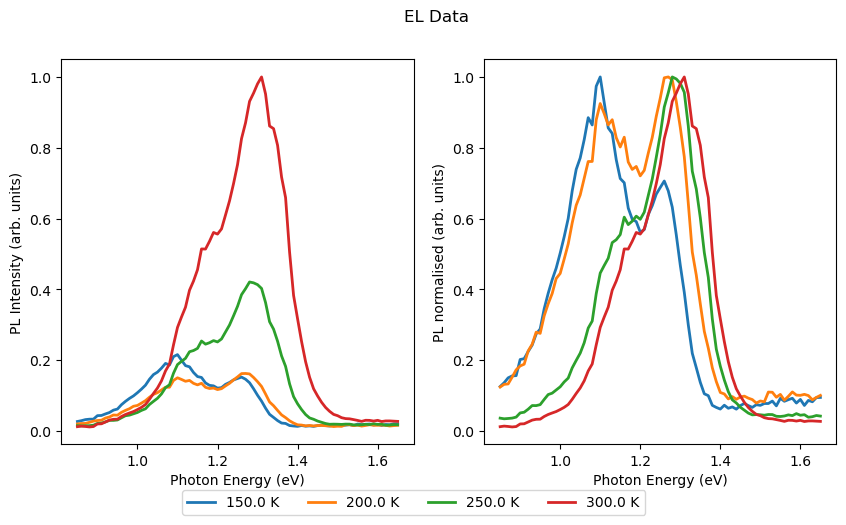

In [107]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id, file in enumerate(csv_files):
    print(id, file)
csv_name_PL=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO

Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name_PL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_PL, temperature_list_PL, hws_PL,title="PL Data")
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name_EL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_EL, temperature_list_EL, hws_EL,title="EL Data")

In [119]:
#initialise parameters for the model
number_free_parameters , sigma, Temp_std_err, hws_std_err, relative_intensity_std_error_PL,relative_intensity_std_error_EL = 5, 0.001, 10, 0.005, 0.05,0.1

model_config = {
        "number_free_parameters": number_free_parameters,
        "sigma": sigma,
        "Temp_std_err": Temp_std_err,
        "hws_std_err": hws_std_err,
        "relative_intensity_std_error_PL": relative_intensity_std_error_PL,
        "relative_intensity_std_error_EL": relative_intensity_std_error_EL,
    }
X = {'temperature_list_PL':temperature_list_PL, 'hws_PL':hws_PL,
     'temperature_list_EL':temperature_list_EL, 'hws_EL':hws_EL}
print(f"size of hw is {hws_PL.shape}")
print(f"size of temperature_list is {temperature_list_PL.shape}")
date = datetime.datetime.now().strftime("%Y_%m_%d")
# generate the data
save_folder = (
    f"fit_experimental_emcee_EL/{date}/{csv_name_PL.split('/')[-1].split('.')[0]}/"
    + "test_sigma=" + str(sigma)
    + "temperature_list=" + str(len(temperature_list_PL))
    + "number_free_parameters=" + str(number_free_parameters)
    + "Temp_std_err="+str(Temp_std_err)
    + "hws_std_err="+str(hws_std_err)
   # + "relative_intensity_std_error_PL="+str(relative_intensity_std_error_PL)
   # + "relative_intensity_std_error_EL="+str(relative_intensity_std_error_EL)
)
os.makedirs(save_folder, exist_ok=True)
# get initial covariance matrix
#get covariance matrix for the experimental data
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])], 0.02, 0.1, 0.1, 0.16]
#co_var_mat_PL = fit_EL_exp_EMCEE.plot_generated_data( temperature_list_PL, hws_PL, save_folder, model_config, savefig=True,true_parameters=init_params)
#plot data with variance
#variance_data = co_var_mat_PL.diagonal().reshape(hws_PL.shape[0],-1).copy()
#fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_data, save_folder)
#for ax in axis:
 #   ax.set_ylim(0, 1.1)

size of hw is (81,)
size of temperature_list is (4,)


shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


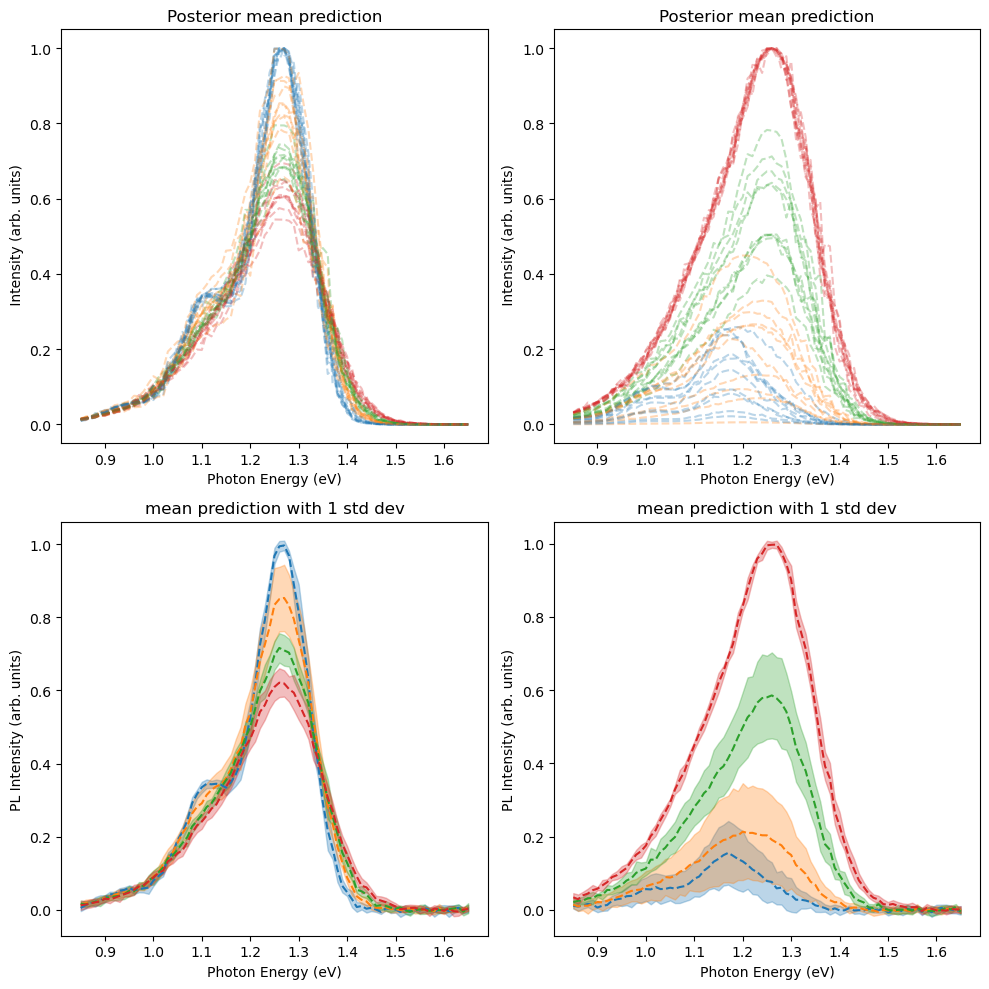

In [120]:
#get the variance of the data and plot it
LE_params = [1.37,1e-03,7.87e-02,1.1e-01, 1.59e-01]
init_params = [1.2, 10, 0.1, 0.1, 0.16,-2]
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])], 10, 0.1, 0.1, 0.16,-2]

co_var_mat_PL,co_var_mat_EL,variance_EL,variance_PL= fit_EL_exp_EMCEE.plot_generated_data(temperature_list_EL, hws_EL,temperature_list_PL,hws_PL, save_folder, model_config,LE_params, savefig=True,true_parameters=init_params)


In [110]:
LE_params = [1.37159386e+00, 1.00000000e-03,7.87203363e-02,1.12738205e-01, 1.59916771e-01]
init_params = [1.2, 10, 0.1, 0.1, 0.16,-2]
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])]-0.1, 9, 0.05, 0.1, 0.16,-2]

soln = fit_EL_exp_EMCEE.get_maximum_likelihood_estimate( Exp_data_EL,Exp_data_PL, co_var_mat_PL,co_var_mat_EL ,X,save_folder,LE_params,init_params)

/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:61: RuntimeWarning: overflow encountered in exp
  EX0 = CT0 * np.exp(-(EX.E-CT.E)/C.kb*D.T) / D.RCTE
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PL_Events.py:33: RuntimeWarning: invalid value encountered in multiply
  D.kr_hw = EX.kr_hw * EX.Sum + CT.kr_hw * CT.Sum
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/fit_EL_exp_EMCEE.py:270: RuntimeWarning: invalid value encountered in divide
  model_data_EL = model_data_EL/np.max(model_data_EL.reshape(-1, 1))
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/fit_EL_exp_EMCEE.py:274: RuntimeWarning: invalid value encountered in divide
  model_data_PL = model_data_PL/np.max(model_data_PL.reshape(-1, 1))


NaN in model_data
NaN in model_data


/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


NaN in model_data
NaN in model_data
NaN in model_data
NaN in model_data
NaN in model_data
[ 1.17  9.    0.05  0.1   0.16 -2.  ]
Maximum likelihood estimates:
  E_CT = 1.170
  K_EXCT = 9.000
  LI = 0.050
  L0 = 0.100
  H0 = 0.160
  fosc_ct = -2.000
Maximum log likelihood: 10418.212167695327


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'temperature=150.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=200.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=250.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>,
        <Axes: title={'center': 'temperature=300.0 K'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>],
       dtype=object))

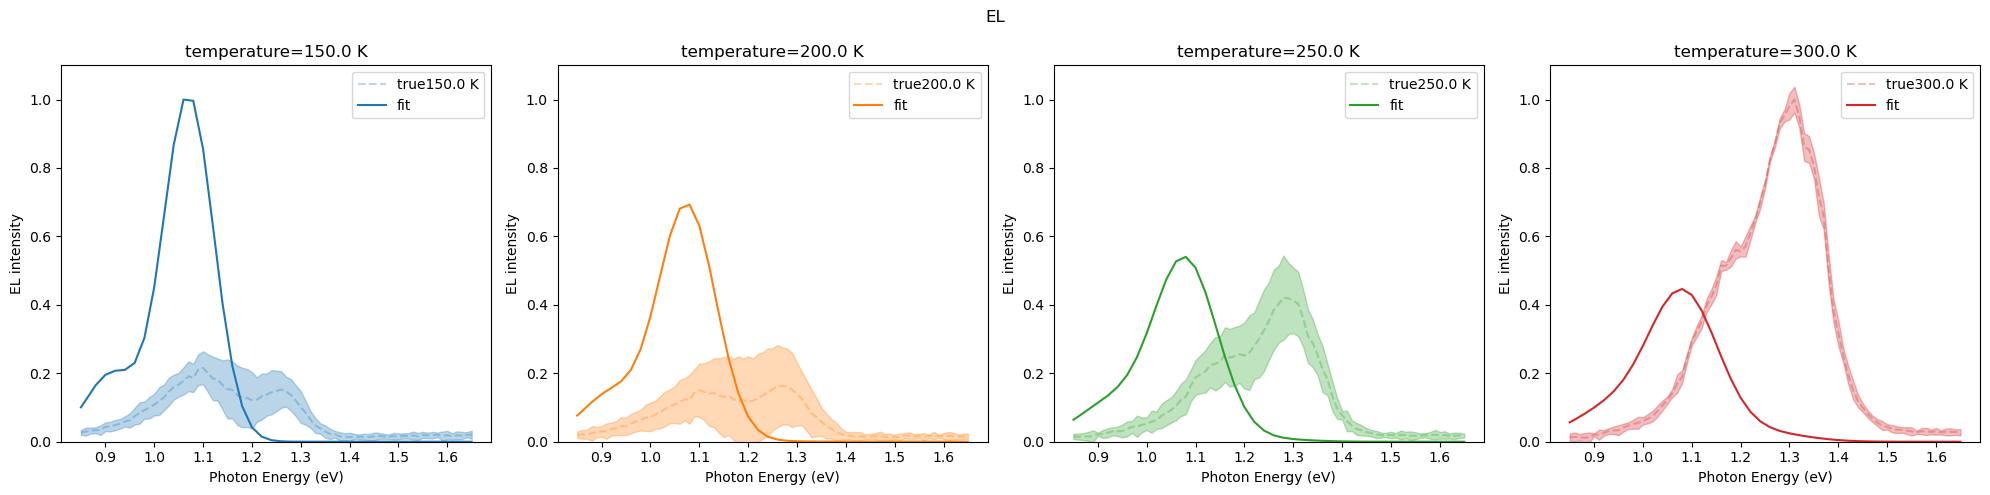

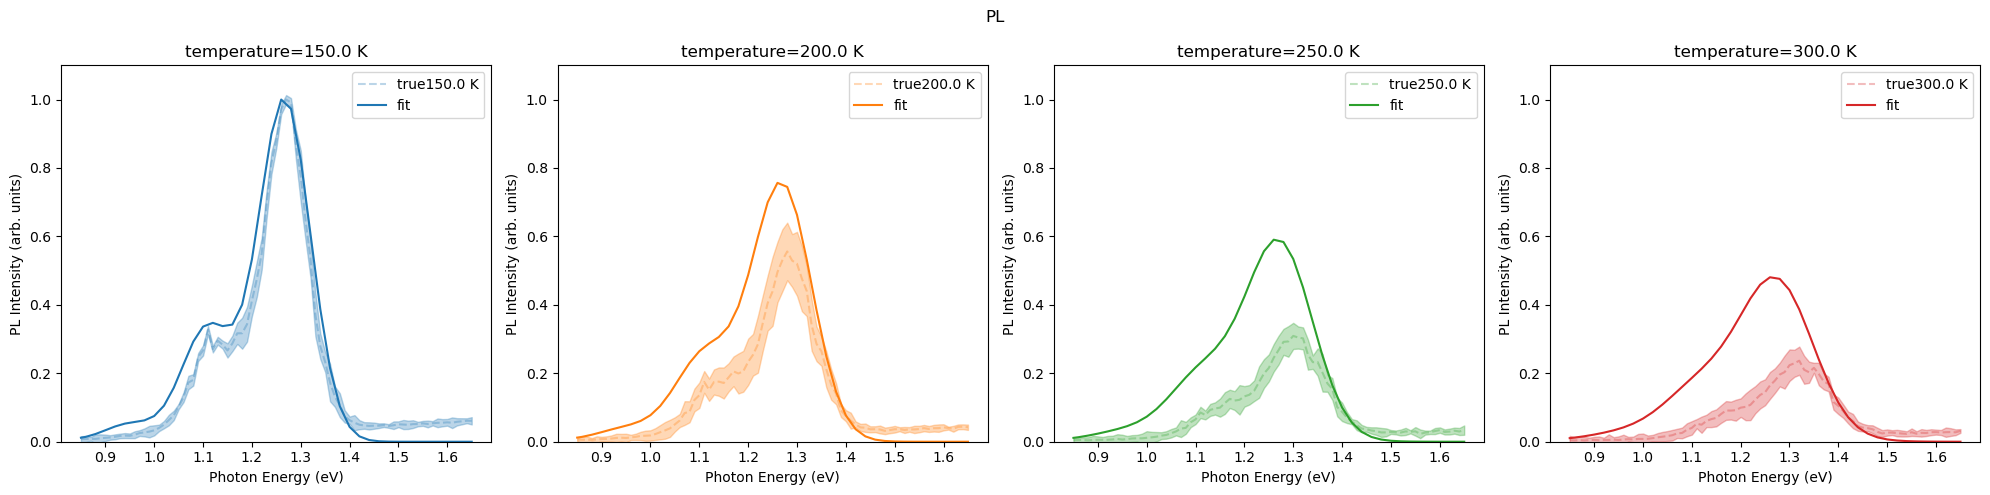

In [121]:
true_parameters = soln.x
def plot_exp_data_with_variance(true_parameters,temperature_list_EL,hws_EL,temperature_list_PL,hws_PL,LE_params,variance_EL,variance_PL,save_folder):
    model_data_EL, model_data_PL= fit_EL_exp_EMCEE.el_trial(list(true_parameters), temperature_list_EL, hws_EL,temperature_list_PL,hws_PL,LE_params)
    truemodel_pl = model_data_PL/np.max(model_data_PL.reshape(-1,1))
    truemodel_el = model_data_EL/np.max(model_data_EL.reshape(-1,1))
    fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)

    for i,axes  in enumerate(axis): 
        axes.plot(hws_EL,truemodel_el[:,i],label='fit',color="C" + str(i) )
        axes.legend()
        axes.set_ylim(0,1.1)
        axes.set_ylabel("EL intensity")
    fig.suptitle("EL")
    fig.tight_layout(h_pad=0.0)
    fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)

    for i,axes  in enumerate(axis): 
        axes.plot(hws_PL,truemodel_pl[:,i],label='fit',color="C" + str(i) )
        axes.legend()
        axes.set_ylim(0,1.1)
    fig.suptitle("PL")
    fig.tight_layout(h_pad=0.0)
    return fig,axis

plot_exp_data_with_variance(true_parameters,temperature_list_EL,hws_EL,temperature_list_PL,hws_PL,LE_params,variance_EL,variance_PL,save_folder)

In [123]:
import importlib
importlib.reload(fit_EL_exp_EMCEE)

sampler = fit_EL_exp_EMCEE.run_sampler_single(save_folder, soln, Exp_data_EL,Exp_data_PL, co_var_mat_EL,co_var_mat_PL,LE_params, X,nsteps=100,coeff_spread=10)

Initial size: 0
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  0%|          | 0/100 [00:00<?, ?it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  1%|          | 1/100 [00:00<00:52,  1.89it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  2%|▏         | 2/100 [00:01<01:21,  1.20it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  3%|▎         | 3/100 [00:02<01:07,  1.44it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  4%|▍         | 4/100 [00:02<00:59,  1.60it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  5%|▌         | 5/100 [00:03<01:13,  1.29it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  6%|▌         | 6/100 [00:04<01:04,  1.45it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  7%|▋         | 7/100 [00:05<01:14,  1.25it/s]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  8%|▊         | 8/100 [00:07<02:06,  1.38s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


  9%|▉         | 9/100 [00:09<02:25,  1.60s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 10%|█         | 10/100 [00:11<02:23,  1.59s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 11%|█         | 11/100 [00:12<02:06,  1.42s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 12%|█▏        | 12/100 [00:14<02:08,  1.46s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 13%|█▎        | 13/100 [00:17<03:05,  2.13s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 14%|█▍        | 14/100 [00:19<03:02,  2.12s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 15%|█▌        | 15/100 [00:20<02:32,  1.79s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 16%|█▌        | 16/100 [00:24<03:04,  2.20s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 17%|█▋        | 17/100 [00:25<02:34,  1.86s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 18%|█▊        | 18/100 [00:27<02:38,  1.93s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 19%|█▉        | 19/100 [00:30<03:05,  2.29s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 20%|██        | 20/100 [00:32<03:10,  2.39s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 21%|██        | 21/100 [00:36<03:26,  2.62s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 22%|██▏       | 22/100 [00:38<03:11,  2.46s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 23%|██▎       | 23/100 [00:40<03:00,  2.35s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 24%|██▍       | 24/100 [00:42<03:03,  2.42s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 25%|██▌       | 25/100 [00:45<03:05,  2.48s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 26%|██▌       | 26/100 [00:49<03:29,  2.83s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 27%|██▋       | 27/100 [00:52<03:44,  3.07s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 28%|██▊       | 28/100 [00:55<03:42,  3.09s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 29%|██▉       | 29/100 [00:58<03:29,  2.94s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 30%|███       | 30/100 [01:00<02:57,  2.53s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 31%|███       | 31/100 [01:04<03:39,  3.18s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 32%|███▏      | 32/100 [01:06<03:14,  2.86s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 33%|███▎      | 33/100 [01:10<03:27,  3.10s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 34%|███▍      | 34/100 [01:15<03:56,  3.58s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 35%|███▌      | 35/100 [01:17<03:33,  3.29s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 36%|███▌      | 36/100 [01:21<03:47,  3.55s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 37%|███▋      | 37/100 [01:24<03:26,  3.27s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 38%|███▊      | 38/100 [01:28<03:29,  3.39s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 39%|███▉      | 39/100 [01:32<03:50,  3.77s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 40%|████      | 40/100 [01:37<04:02,  4.05s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 41%|████      | 41/100 [01:40<03:42,  3.77s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 42%|████▏     | 42/100 [01:44<03:45,  3.89s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 43%|████▎     | 43/100 [01:49<03:55,  4.13s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 44%|████▍     | 44/100 [01:53<03:51,  4.14s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 45%|████▌     | 45/100 [01:56<03:22,  3.68s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 46%|████▌     | 46/100 [02:00<03:26,  3.83s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 47%|████▋     | 47/100 [02:06<03:52,  4.40s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 48%|████▊     | 48/100 [02:11<04:01,  4.64s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 49%|████▉     | 49/100 [02:16<03:57,  4.65s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 50%|█████     | 50/100 [02:19<03:37,  4.35s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 51%|█████     | 51/100 [02:25<03:46,  4.61s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 52%|█████▏    | 52/100 [02:30<03:50,  4.80s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 53%|█████▎    | 53/100 [02:34<03:44,  4.77s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 54%|█████▍    | 54/100 [02:40<03:45,  4.90s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 55%|█████▌    | 55/100 [02:44<03:30,  4.68s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 56%|█████▌    | 56/100 [02:48<03:19,  4.53s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 57%|█████▋    | 57/100 [02:53<03:17,  4.59s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 58%|█████▊    | 58/100 [02:56<03:00,  4.31s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 59%|█████▉    | 59/100 [03:04<03:33,  5.20s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 60%|██████    | 60/100 [03:09<03:34,  5.37s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 61%|██████    | 61/100 [03:15<03:28,  5.34s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 62%|██████▏   | 62/100 [03:21<03:29,  5.51s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 63%|██████▎   | 63/100 [03:26<03:21,  5.44s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 64%|██████▍   | 64/100 [03:30<03:02,  5.07s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 65%|██████▌   | 65/100 [03:36<03:04,  5.28s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 66%|██████▌   | 66/100 [03:41<02:53,  5.12s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 67%|██████▋   | 67/100 [03:47<03:05,  5.63s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 68%|██████▊   | 68/100 [03:53<02:56,  5.52s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 69%|██████▉   | 69/100 [03:58<02:53,  5.60s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 70%|███████   | 70/100 [04:05<02:54,  5.81s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 71%|███████   | 71/100 [04:10<02:47,  5.77s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 72%|███████▏  | 72/100 [04:17<02:50,  6.08s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 73%|███████▎  | 73/100 [04:22<02:37,  5.82s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 74%|███████▍  | 74/100 [04:28<02:26,  5.65s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 75%|███████▌  | 75/100 [04:32<02:10,  5.21s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 76%|███████▌  | 76/100 [04:37<02:05,  5.22s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 77%|███████▋  | 77/100 [04:42<01:56,  5.06s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 78%|███████▊  | 78/100 [04:46<01:42,  4.64s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 79%|███████▉  | 79/100 [04:51<01:41,  4.82s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 80%|████████  | 80/100 [04:57<01:45,  5.26s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 81%|████████  | 81/100 [05:03<01:42,  5.41s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 82%|████████▏ | 82/100 [05:07<01:30,  5.04s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 83%|████████▎ | 83/100 [05:12<01:26,  5.10s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 84%|████████▍ | 84/100 [05:18<01:27,  5.46s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 85%|████████▌ | 85/100 [05:22<01:11,  4.76s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 86%|████████▌ | 86/100 [05:27<01:10,  5.06s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 87%|████████▋ | 87/100 [05:32<01:04,  4.96s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 88%|████████▊ | 88/100 [05:38<01:02,  5.19s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 89%|████████▉ | 89/100 [05:45<01:02,  5.68s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 90%|█████████ | 90/100 [05:50<00:56,  5.70s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 91%|█████████ | 91/100 [05:57<00:52,  5.87s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 92%|█████████▏| 92/100 [06:01<00:44,  5.52s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 93%|█████████▎| 93/100 [06:07<00:38,  5.44s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 94%|█████████▍| 94/100 [06:12<00:32,  5.37s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 95%|█████████▌| 95/100 [06:19<00:29,  5.97s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 96%|█████████▌| 96/100 [06:26<00:24,  6.22s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 97%|█████████▋| 97/100 [06:33<00:19,  6.55s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 98%|█████████▊| 98/100 [06:39<00:12,  6.32s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


 99%|█████████▉| 99/100 [06:46<00:06,  6.47s/it]

log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf
log prior is -inf


100%|██████████| 100/100 [06:51<00:00,  5.95s/it]/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]
100%|██████████| 100/100 [06:51<00:00,  4.11s/it]

[nan nan nan nan nan nan]
single process took 411.7 seconds


(3200,)


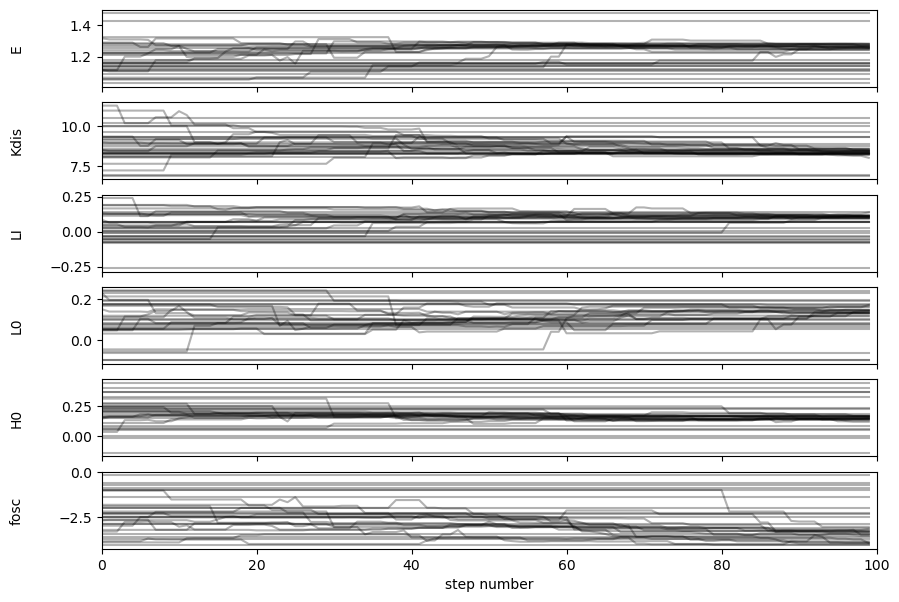

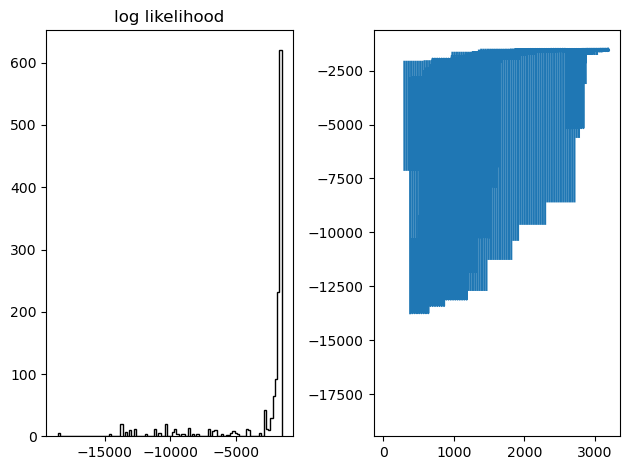

In [124]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["E", "Kdis", "LI", "L0", "H0","fosc"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
#fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
flat_samples = sampler.get_log_prob(discard=0, thin=1, flat=True)
print(flat_samples.shape)
fig, axes = plt.subplots(1,2)
hist = axes[0].hist(flat_samples[flat_samples>-1e9], 100, color="k", histtype="step")
axes[0].set_title("log likelihood")
axes[1].plot(flat_samples)
fig.tight_layout()

In [103]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
for id, file in enumerate(csv_files):
    print(id, file)


0 experiemental_data/blends/PM6Y61_1PL.csv
1 experiemental_data/blends/PM6Y61_1_test_EL.csv
2 experiemental_data/blends/PM6Y61_1EL.csv
3 experiemental_data/blends/PM6Y61_1_test_PL.csv


In [96]:
csv_name_PL=csv_files[3]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO
results_name = csv_name_PL.replace('.csv','').split('/')[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/fit_EL_exp_EMCEE.py --test_number 2 --data_file_EL {csv_name_EL}  --data_file_PL {csv_name_PL} --coeff_spread 5 \n"#${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
#print(script) 
with open(f'HPC_bash_script/{sh_name}', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  
script= f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"#submit to HPC
!{script}

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


In [97]:
# analyse results
import importlib
import glob
csv_files = glob.glob('experiemental_data/*/*.csv')
#csv_names=[csv_files[x] for x in [3,18,12]]#3 for y6, 18 for ITIC,12 for L8BO
csv_names = csv_files
list_params = []

for csv_name in csv_names:
    folder = glob.glob(f"fit_experimental_emcee_EL/*/{csv_name.replace('.csv','').split('/')[-1]}/*")
    for f in folder:
        name = f.split('/')[-1]
        if 'sampler.h5' in os.listdir(f):
            
            saver_folder = f
            params_dict = {}
            for x in name.split('_'):
                if '=' in x:
                    try:
                        params_dict[x.split('=')[0]]=int(x.split('=')[1])
                    except:
                        pass
                        #print(x)
            # put results into a dataframe
        # reload sampler from file
            try:
                filename = f + "/sampler.h5"

                reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
                distribution = reader.get_chain(discard=1, thin=5, flat=True)
                true_parameters=list(np.mean(distribution,axis=0))
                params_dict['mean'] = [f"{x:.3f}" for x in true_parameters]      
                params_dict['saved_folder'] = f        
                params_dict['num_iteration'] = reader.iteration  
                params_dict['exp_data'] = csv_name.split('/')[-1]   
                log_prob = reader.get_log_prob(discard=2, thin=1, flat=True)  
                params_dict['max_log_prob'] = np.max(log_prob)
                params_dict['csv_position'] = csv_names.index(csv_name)
                list_params.append(params_dict)                      
            except:
                print('error')
                print(f)
                print('error')
                pass

import pandas as pd
df = pd.DataFrame.from_records(list_params)
df


,mean,saved_folder,num_iteration,exp_data,max_log_prob,csv_position
0,"[1.297, 9.186, 0.122, 0.035, 0.171, -2.417]",fit_experimental_emcee_EL/2024_02_21/PM6Y61_1P...,12847,PM6Y61_1PL.csv,-1577.195547,22
1,"[1.152, 8.534, 0.047, 0.036, 0.167, -2.286]",fit_experimental_emcee_EL/2024_02_20/PM6Y61_1P...,10,PM6Y61_1PL.csv,-8035.923377,22
2,[219562209099955199333422268054714456607793208...,fit_experimental_emcee_EL/2024_02_21/PM6Y61_1_...,2589,PM6Y61_1_test_PL.csv,-11732.385840,25
3,"[0.997, 8.041, 0.036, 0.207, 0.204, -3.934]",fit_experimental_emcee_EL/2024_02_22/PM6Y61_1_...,464,PM6Y61_1_test_PL.csv,-11116.677293,25


In [98]:
#plot posterior predictive

model_config = {
        "number_free_parameters": 6,
        "sigma": 0.01,
        "Temp_std_err": 2,
        "hws_std_err": 0.005,
        "relative_intensity_std_error_PL": 0.01,
        "relative_intensity_std_error_EL": 0.01,
    }
save_folder = 0

In [99]:
#load data and plot the relevant histograms
index = 3
filename = df['saved_folder'][index] + "/sampler.h5"
csv_name = csv_names[df['csv_position'][index]]

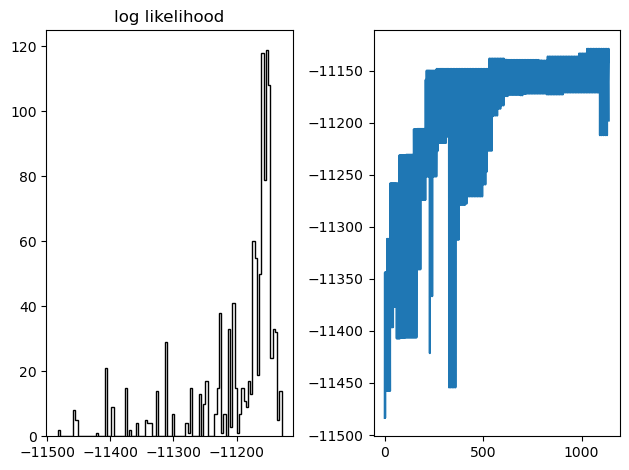

In [100]:
reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")

distribution = reader.get_chain(discard=1, thin=5, flat=True)
fig, axes = plt.subplots(1,2)
flat_samples = flat_samples[flat_samples>-1e9]
hist = axes[0].hist(flat_samples, 100, color="k", histtype="step")
axes[0].set_title("log likelihood")
axes[1].plot(np.arange(len(flat_samples)),flat_samples)
fig.tight_layout()


Initial size: 471
(15008,)


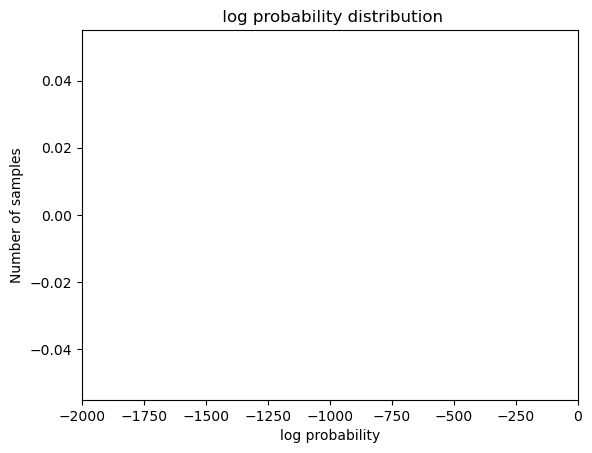

(15008,)
experiemental_data/blends/PM6Y61_1_test_PL.csv
 true parameter mean [0.9966287187848906, 8.04097767927848, 0.03643440188944221, 0.20743280943082285, 0.20361490240784877, -3.933603005041981]
shape of mean value plot is (81, 4)
shape of mean value plot is (81, 4)


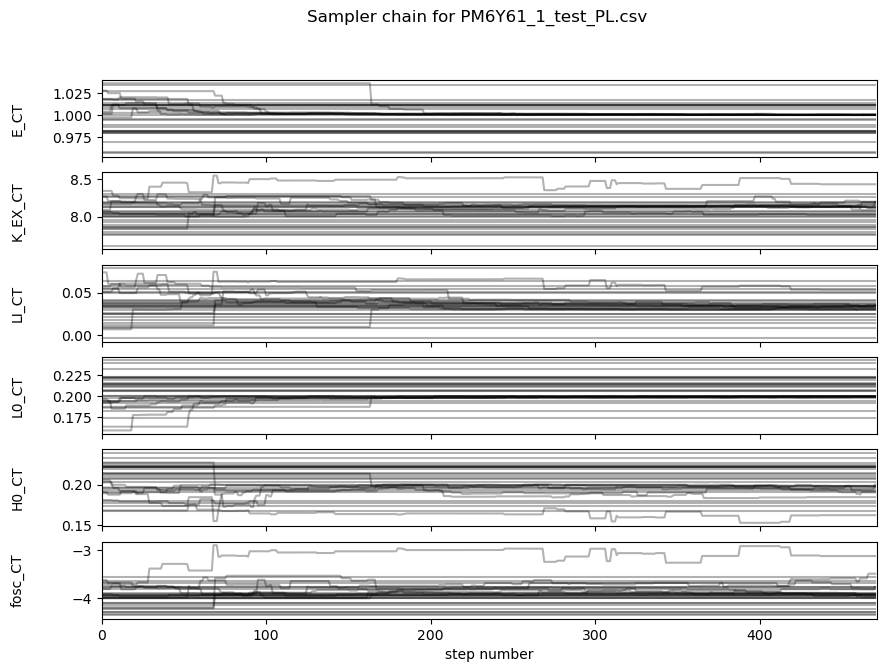

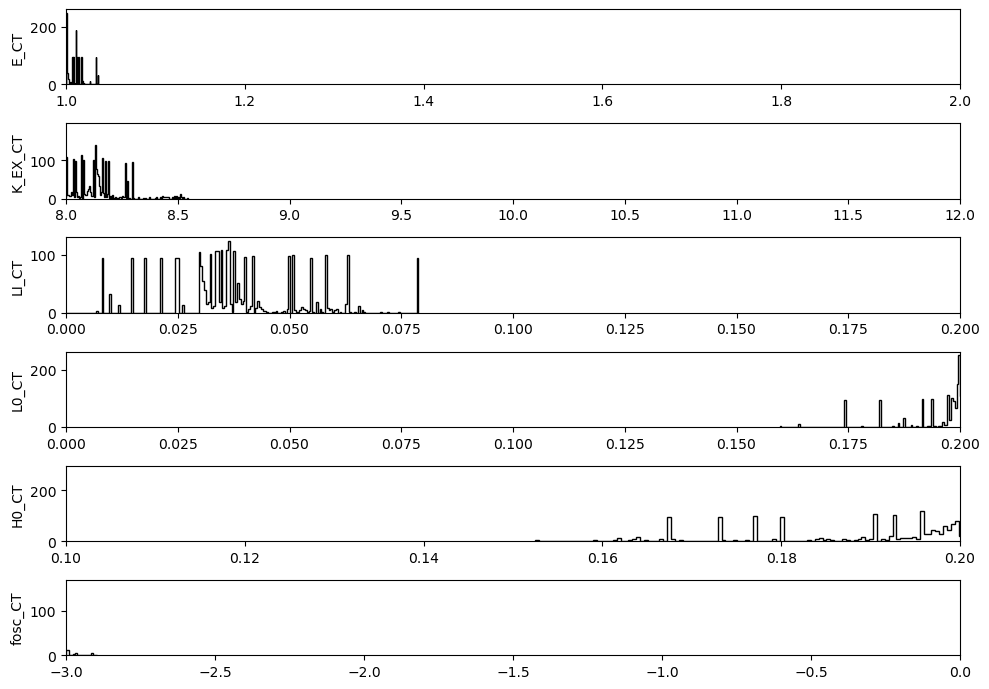

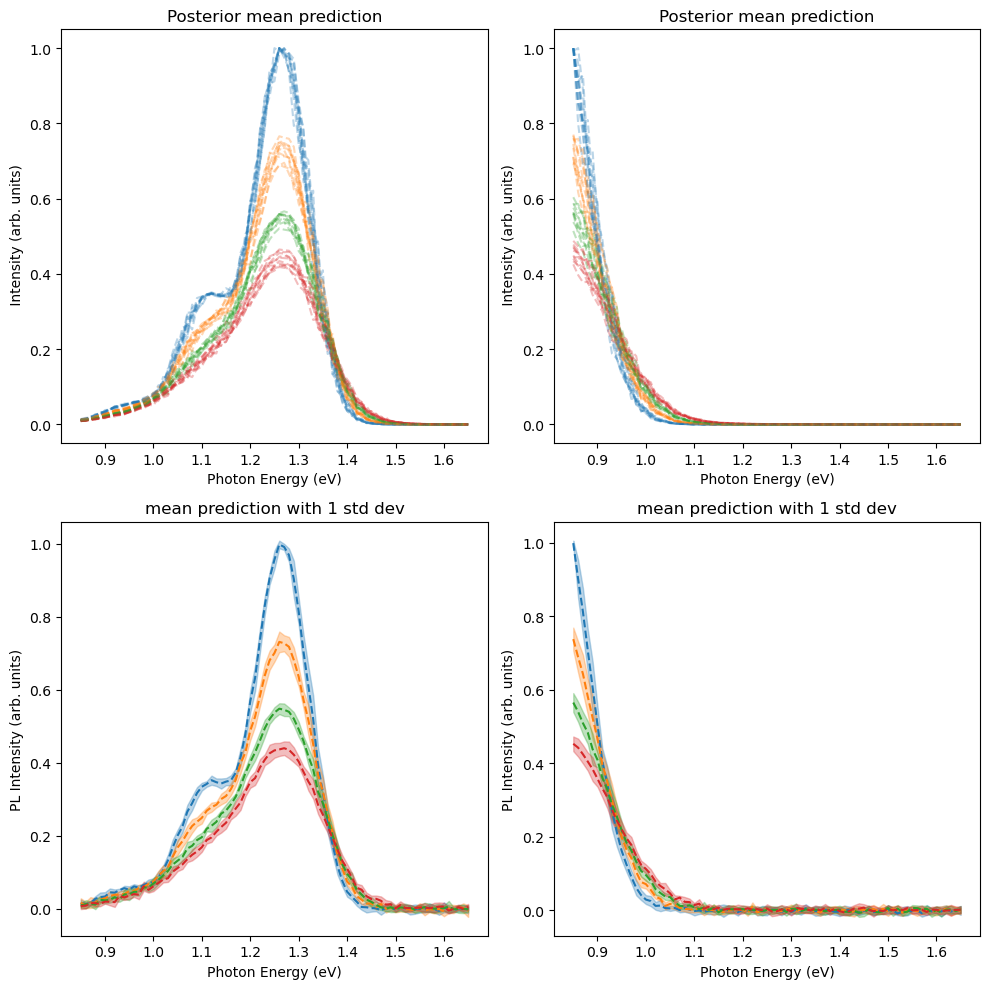

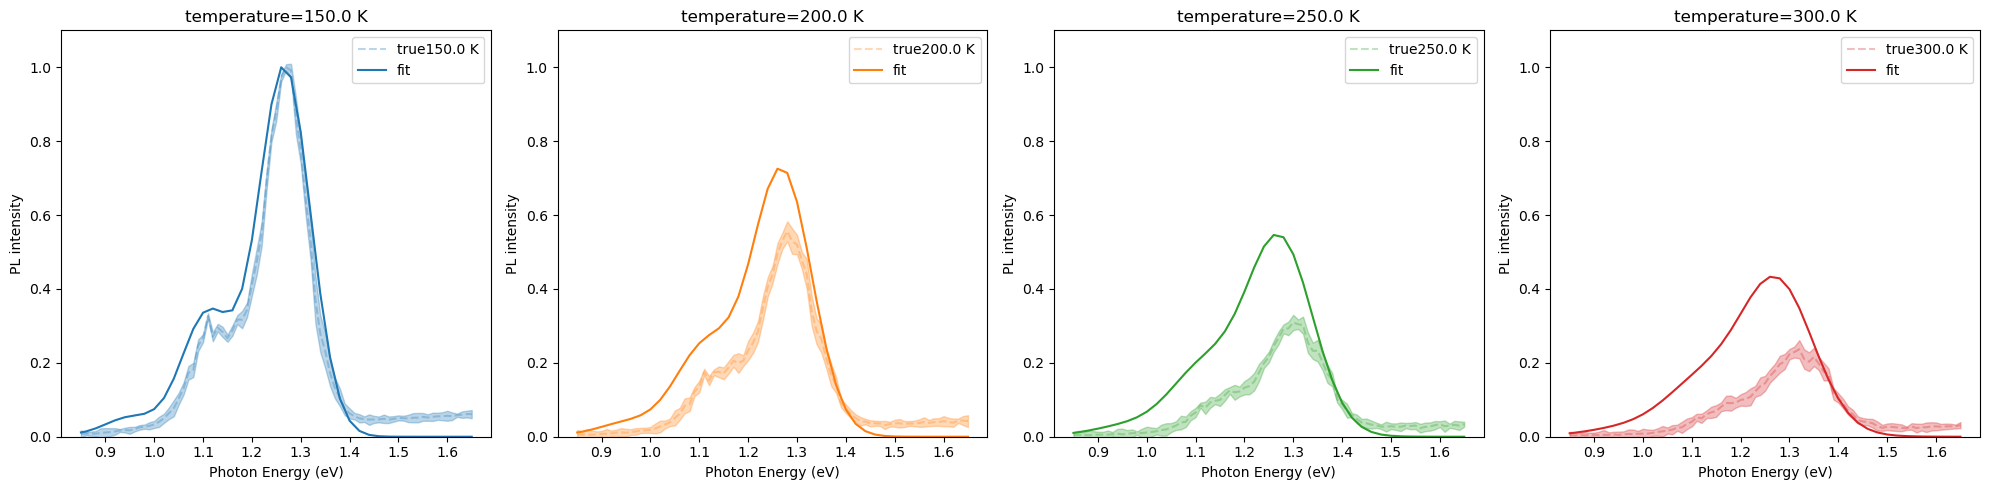

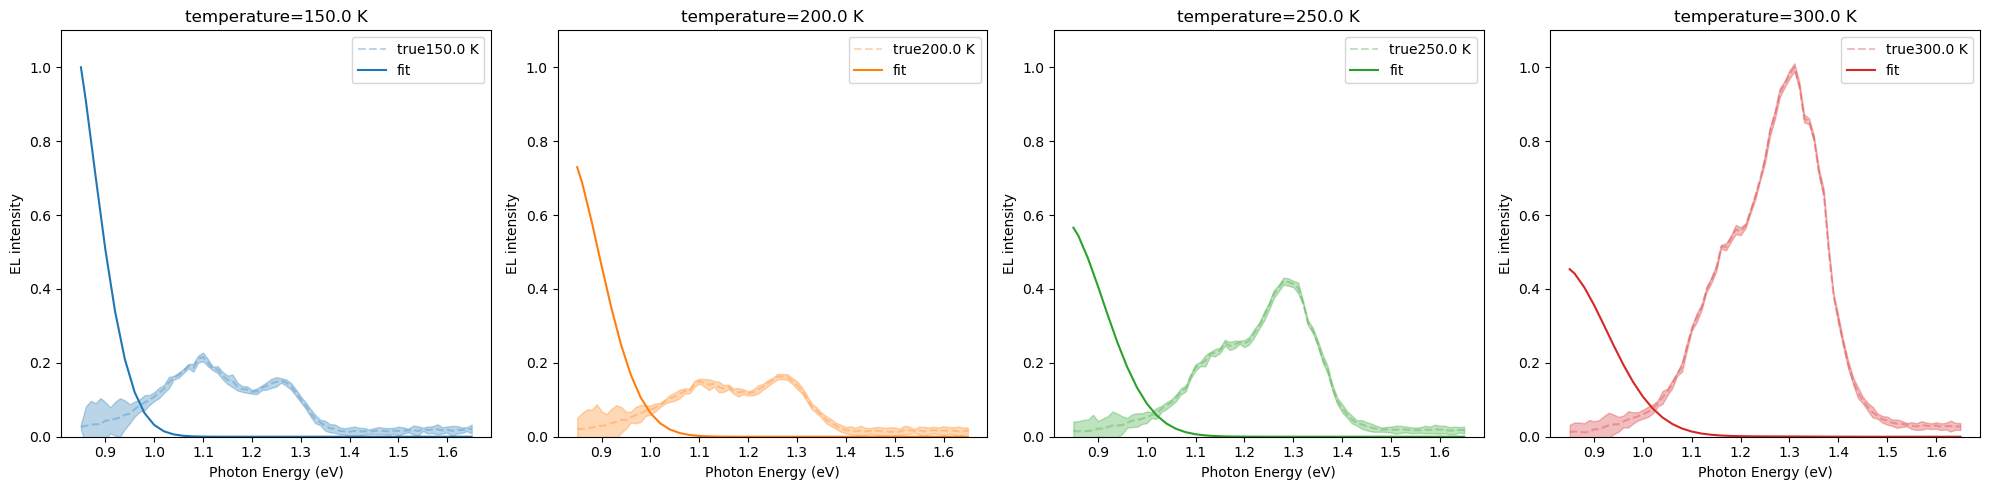

In [101]:
#load data and plot the relevant histograms

reader = fit_EL_exp_EMCEE.hDFBackend_2(filename, name="multi_core")
print("Initial size: {0}".format(reader.iteration))
flat_samples = reader.get_log_prob(discard=2, thin=1, flat=True)
print(flat_samples.shape)
plt.hist(flat_samples[flat_samples>-1e4], 100, color="k", histtype="step")
plt.xlabel("log probability")
plt.ylabel("Number of samples")
plt.xlim(-2000,0)
plt.title(' log probability distribution')
plt.show()
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = reader.get_chain()
labels = ["E_CT", "K_EX_CT", "LI_CT", "L0_CT", "H0_CT","fosc_CT"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()
#flat_samples.shape
distribution = reader.get_chain(discard=1, thin=5, flat=True)
true_parameters=list(np.mean(distribution,axis=0))
print(flat_samples.shape)
fig, axes = plt.subplots(6, figsize=(10, 7))
axes_xlim = [[1,2],[8,12],[0,0.2],[0,0.2],[0.1,0.2],[-3,0]]
for i in range(ndim):
    ax = axes[i]
    ax.hist(distribution[:, i], 200, color="k", histtype="step")
    #ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.set_xlim(axes_xlim[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)
fig.tight_layout()
fig.show()
# add noise to the data and plot it now with the fitted parameters
#plot posterior predictive
print(csv_name)
Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name)
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name.replace('PL','EL'))
LE_params = [1.37,1e-03,7.87e-02,1.1e-01, 1.59e-01] 
true_parameters=list(np.mean(distribution,axis=0))
print(' true parameter mean' ,true_parameters)
model_data_EL, model_data_PL= fit_EL_exp_EMCEE.el_trial(list(true_parameters), temperature_list_EL, hws_EL,temperature_list_PL,hws_PL,LE_params)
model_data_EL = model_data_EL/np.max(model_data_EL.reshape(-1,1))
model_data_PL = model_data_PL/np.max(model_data_PL.reshape(-1,1))
co_var_mat_PL,co_var_mat_EL,variance_EL,variance_PL= fit_EL_exp_EMCEE.plot_generated_data(temperature_list_EL, hws_EL,temperature_list_PL,hws_PL, save_folder, model_config,LE_params, savefig=False,true_parameters=true_parameters)
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)
for ax in axis:
   ax.set_ylim(0, 1.1)
for i,axes  in enumerate(axis):
    axes.plot(hws_PL,model_data_PL[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("PL intensity")
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)
for ax in axis:
    ax.set_ylim(0, 1.1)
for i,axes  in enumerate(axis):
    axes.plot(hws_EL,model_data_EL[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("EL intensity")


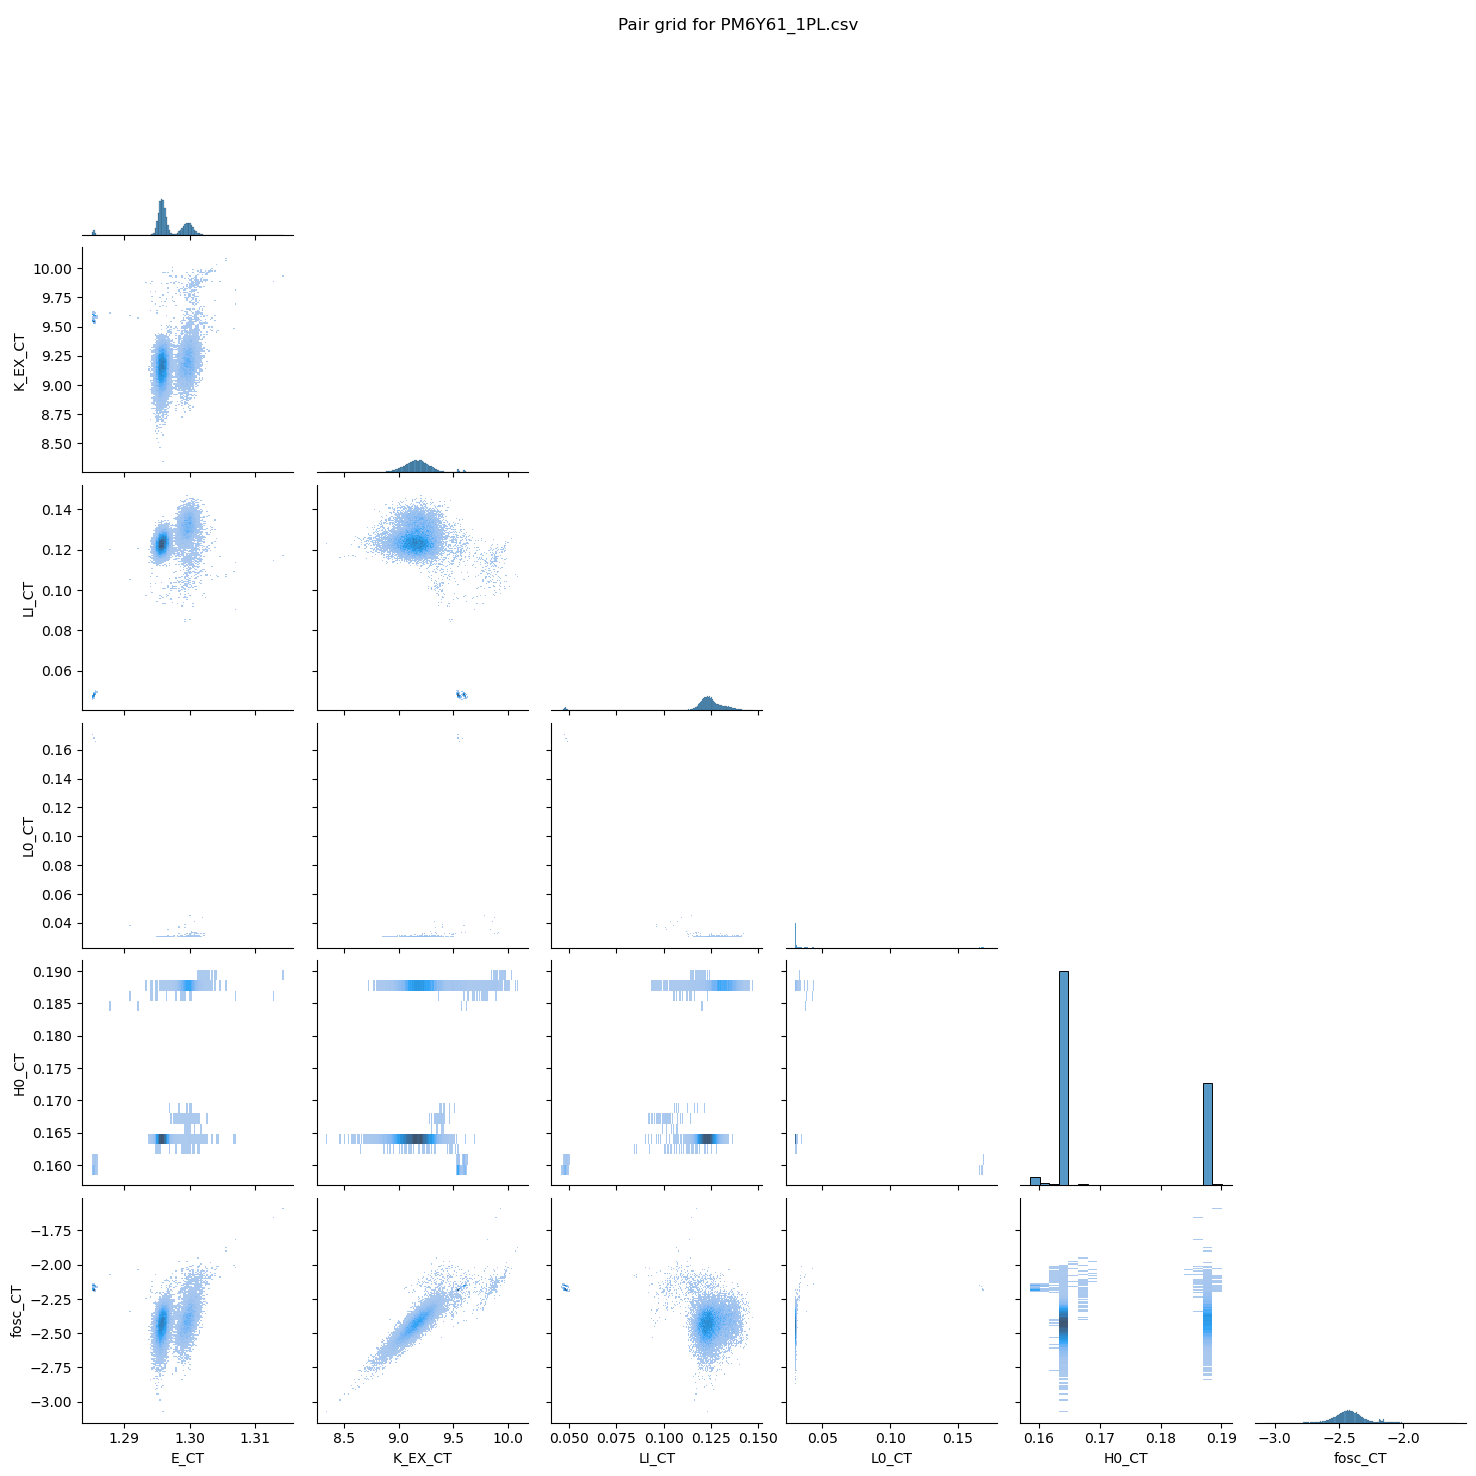

In [30]:
# plot a pair grid plot
import seaborn as sns
#plot posterior predictive


samples = reader.get_chain(discard=100, thin=15, flat=True)
df_samples = pd.DataFrame(samples, columns=labels)
g = sns.pairplot(df_samples, kind="hist", corner=True)
#g = sns.PairGrid(df,diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)
g.figure.suptitle(f"Pair grid for {csv_name.split('/')[-1]}")
g.figure.show()
